In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier , plot_tree
import time
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [2]:
data = load_iris()

In [3]:
data_df = pd.DataFrame(data = data.data, columns = data.feature_names)

In [4]:
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data_df['species'] = pd.Categorical.from_codes(data.target , data.target_names)

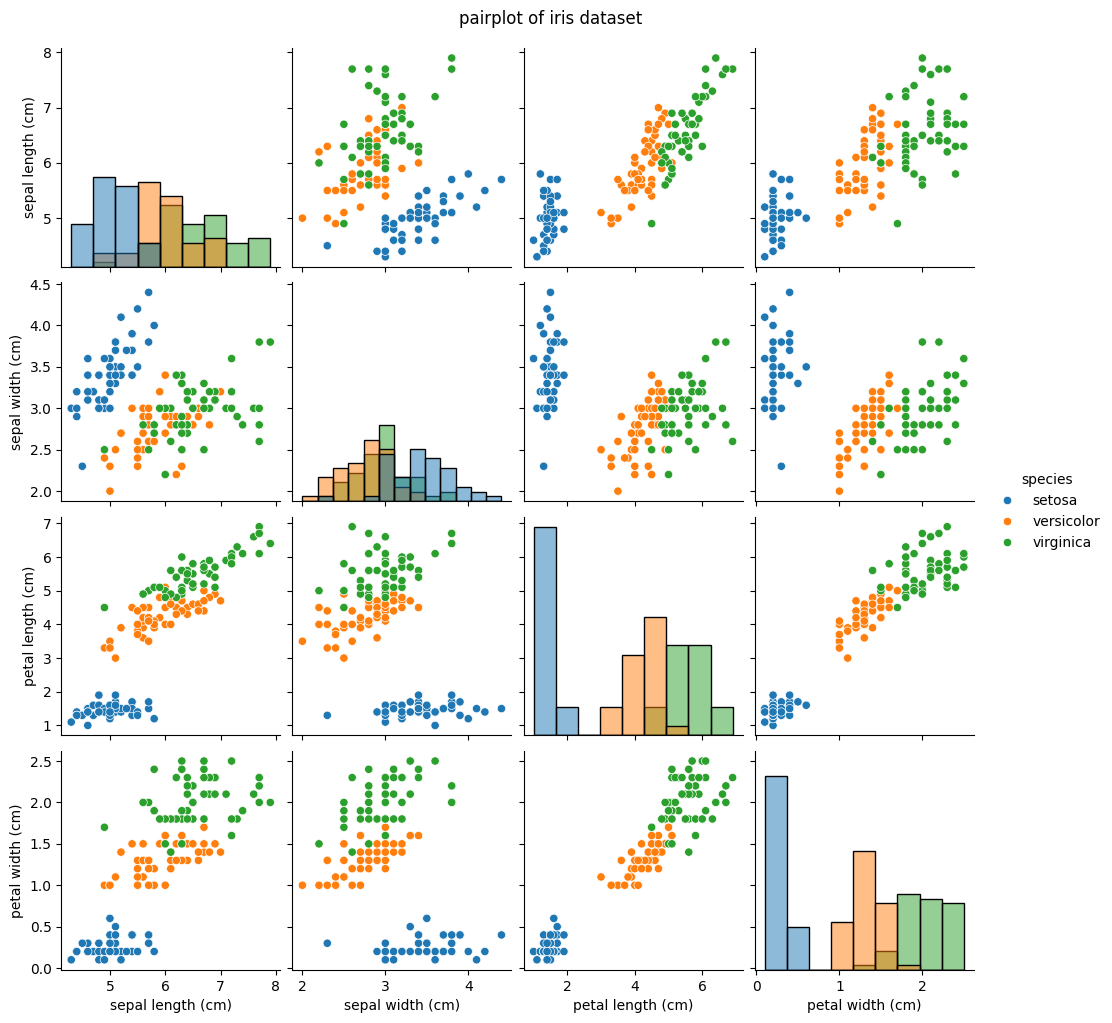

In [6]:
pairplot = sns.pairplot(data_df, hue='species', diag_kind='hist')
pairplot.fig.suptitle("pairplot of iris dataset", y=1.02)
plt.show()


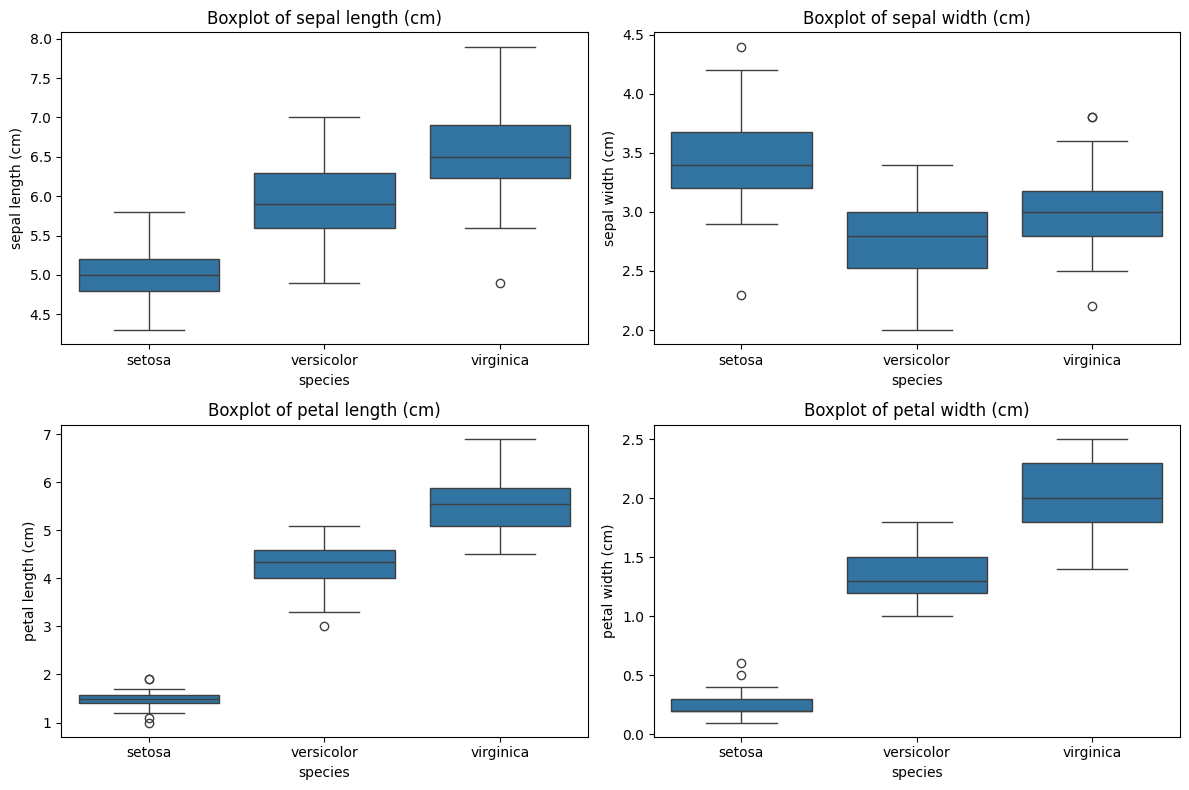

In [7]:
plt.figure(figsize=(12,8))
for i , feature in enumerate(data.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=data_df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [8]:
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
 def get_train_test(data_df,data, mask_col=None):
        
    # splitting into train and test dataset
    X = data_df[data.feature_names]
    y = data_df['species']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    if mask_col:
        X_train, X_test = X_train[mask_col], X_test[mask_col]
    print("Train Feature: {0}\nTest Feature: {1}\nTrain Target: {2}\nTest Target: {3}\n".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    # bringing all of the features into a similar scale
    scaler = preprocessing.StandardScaler()
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    # imputing missing or invalid values
    my_imputer = SimpleImputer()
    X_train = my_imputer.fit_transform(X_train)
    X_test = my_imputer.transform(X_test)
    return X_train, X_test, y_train, y_test, X, y


In [10]:
X_train, X_test, y_train, y_test, X, y = get_train_test(data_df , data)

Train Feature: (100, 4)
Test Feature: (50, 4)
Train Target: (100,)
Test Target: (50,)



In [18]:
def evaluate(y_pred,y_test):
    acc = round(accuracy_score(y_pred, y_test)*100, 2)
    f1 = round(f1_score(y_pred, y_test , average='weighted')*100, 2)
    prec = round(precision_score(y_pred, y_test, average='weighted')*100, 2)
    rec = round(recall_score(y_pred, y_test, average='weighted')*100, 2)
    try:    
        roc = round(roc_auc_score(y_pred, y_test)*100, 2)
    except ValueError:
        roc = 'NA'
    print(classification_report(y_pred, y_test))
    print("[INFO]: Accuracy: {0}".format(acc))
    print("[INFO]: F1 Score: {0}".format(f1))
    print("[INFO]: precision: {0}".format(prec))
    print("[INFO]: recall: {0}".format(rec))
    print("[INFO]: Area Under ROC Curve: {0}".format(roc))
    print()

In [19]:
for model in [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42), MLPClassifier(random_state=42), SVC(random_state=42) , KNeighborsClassifier() , DecisionTreeClassifier(random_state=42) ,GaussianNB() ]:    
    model.fit(X_train, y_train)
    start_time = time.time()
    y_pred = model.predict(X_test)
    print("--- %s seconds ---" % (time.time() - start_time))
    print("[INFO]: Fitting", str(model), "...")
    evaluate(y_pred, y_test)

--- 0.0001399517059326172 seconds ---
[INFO]: Fitting LogisticRegression(random_state=42) ...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[INFO]: Accuracy: 100.0
[INFO]: F1 Score: 100.0
[INFO]: precision: 100.0
[INFO]: recall: 100.0
[INFO]: Area Under ROC Curve: NA

--- 0.0016727447509765625 seconds ---
[INFO]: Fitting RandomForestClassifier(random_state=42) ...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.94      0.97        16
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98   

/Users/abadi/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abadi/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
